# Hallo

`codefragment`

In [7]:
import pandas as pd

coverage = pd.read_csv("../input/spring-petclinic/jacoco.csv", 
                       usecols=[1,2,7,8])
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24
1,org.springframework.samples.petclinic.model,NamedEntity,1,4
2,org.springframework.samples.petclinic.model,Specialty,0,1
3,org.springframework.samples.petclinic.model,PetType,0,1
4,org.springframework.samples.petclinic.model,Vets,4,0


In [9]:
coverage['LINES'] = coverage.LINE_COVERED + coverage.LINE_MISSED
coverage['RATIO'] = coverage.LINE_COVERED / coverage.LINES
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,LINES,RATIO
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.0
1,org.springframework.samples.petclinic.model,NamedEntity,1,4,5,0.8
2,org.springframework.samples.petclinic.model,Specialty,0,1,1,1.0
3,org.springframework.samples.petclinic.model,PetType,0,1,1,1.0
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0


In [10]:
coverage[coverage['RATIO'] == 0]

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,LINES,RATIO
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0
19,org.springframework.samples.petclinic.util,EntityUtils,6,0,6,0.0
21,org.springframework.samples.petclinic.reposito...,JdbcVisitRowMapper,7,0,7,0.0
22,org.springframework.samples.petclinic.reposito...,JdbcPetRepositoryImpl,33,0,33,0.0
23,org.springframework.samples.petclinic.reposito...,JdbcVetRepositoryImpl,17,0,17,0.0
24,org.springframework.samples.petclinic.reposito...,JdbcPetRowMapper,9,0,9,0.0
25,org.springframework.samples.petclinic.reposito...,JdbcVisitRepositoryImpl,26,0,26,0.0
26,org.springframework.samples.petclinic.reposito...,JdbcPet,7,0,7,0.0
27,org.springframework.samples.petclinic.reposito...,JdbcPetVisitExtractor,8,0,8,0.0
28,org.springframework.samples.petclinic.reposito...,JdbcOwnerRepositoryImpl,43,0,43,0.0


In [13]:
grouped_by_package = coverage.groupby('PACKAGE').mean()
grouped_by_package

,LINE_MISSED,LINE_COVERED,LINES,RATIO
PACKAGE,,,,
org.springframework.samples.petclinic,0.000000,24.000000,24.000000,1.000000
org.springframework.samples.petclinic.model,3.300000,7.500000,10.800000,0.739048
org.springframework.samples.petclinic.repository.jdbc,18.750000,0.000000,18.750000,0.000000
org.springframework.samples.petclinic.repository.jpa,1.750000,5.250000,7.000000,0.691558
org.springframework.samples.petclinic.service,2.000000,16.000000,18.000000,0.888889
org.springframework.samples.petclinic.util,8.500000,6.500000,15.000000,0.270833
org.springframework.samples.petclinic.web,5.714286,10.714286,16.428571,0.639809


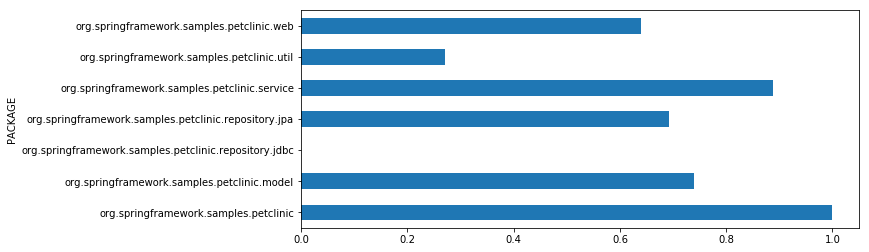

In [15]:
%matplotlib inline
grouped_by_package['RATIO'].plot(kind='barh', figsize=(10,4))
